# STEP 1: Import libraries

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import random
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# STEP 2: Load the data

In [6]:
with open("./traffic-signs-data/train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("./traffic-signs-data/valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("./traffic-signs-data/test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [7]:
X_train, y_train = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']


In [49]:
X_train

array([[[[ 15,  13,  16],
         [ 15,  12,  15],
         [ 14,  12,  14],
         ...,
         [ 15,  12,  14],
         [ 14,  12,  13],
         [ 15,  13,  14]],

        [[ 16,  15,  18],
         [ 14,  13,  16],
         [ 13,  12,  14],
         ...,
         [ 14,  12,  14],
         [ 15,  13,  14],
         [ 15,  13,  13]],

        [[ 15,  14,  17],
         [ 15,  13,  15],
         [ 14,  12,  14],
         ...,
         [ 13,  12,  13],
         [ 14,  12,  15],
         [ 14,  12,  14]],

        ...,

        [[ 17,  16,  19],
         [ 14,  13,  17],
         [ 14,  13,  17],
         ...,
         [ 13,  12,  15],
         [ 15,  13,  17],
         [ 15,  13,  16]],

        [[ 18,  16,  20],
         [ 15,  14,  18],
         [ 14,  13,  17],
         ...,
         [ 13,  13,  17],
         [ 14,  14,  18],
         [ 14,  14,  17]],

        [[ 20,  18,  22],
         [ 17,  15,  19],
         [ 14,  13,  17],
         ...,
         [ 15,  14,  17],
        

In [8]:
X_train.shape

(34799, 32, 32, 3)

In [50]:
y_train

array([25, 10, 18, ...,  2, 34,  2], dtype=uint8)

In [9]:
y_train.shape

(34799,)

In [51]:
X_test

array([[[[116, 139, 174],
         [116, 137, 171],
         [118, 138, 172],
         ...,
         [ 98, 114, 143],
         [ 97, 121, 147],
         [ 85, 105, 130]],

        [[115, 142, 176],
         [115, 140, 174],
         [117, 141, 175],
         ...,
         [119, 143, 176],
         [120, 141, 173],
         [120, 139, 171]],

        [[117, 141, 174],
         [117, 142, 175],
         [114, 140, 172],
         ...,
         [120, 144, 179],
         [122, 144, 179],
         [120, 143, 177]],

        ...,

        [[117, 137, 167],
         [115, 134, 164],
         [117, 135, 164],
         ...,
         [115, 137, 169],
         [116, 136, 168],
         [118, 139, 172]],

        [[116, 136, 166],
         [114, 134, 168],
         [113, 131, 166],
         ...,
         [113, 135, 167],
         [117, 136, 165],
         [115, 139, 167]],

        [[112, 135, 167],
         [110, 134, 165],
         [119, 135, 165],
         ...,
         [115, 138, 167],
        

In [52]:
X_test.shape

(12630, 32, 32, 3)

In [53]:
y_test

array([16,  1, 38, ...,  6,  7, 10], dtype=uint8)

In [54]:
y_test.shape

(12630,)

# STEP 3: Sample image

4

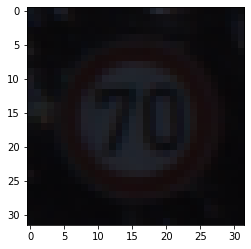

In [56]:
i = 20000
plt.imshow(X_train[i]) 
y_train[i]

# STEP 4: Data Preparation

In [11]:
# Shuffle the dataset 
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

In [12]:
X_train_gray = np.sum(X_train/3, axis=3, keepdims=True)
X_test_gray  = np.sum(X_test/3, axis=3, keepdims=True)
X_validation_gray  = np.sum(X_validation/3, axis=3, keepdims=True) 

In [13]:
X_train_gray_norm = (X_train_gray - 128)/128 
X_test_gray_norm = (X_test_gray - 128)/128
X_validation_gray_norm = (X_validation_gray - 128)/128

In [14]:
X_train_gray.shape

(34799, 32, 32, 1)

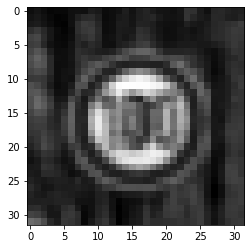

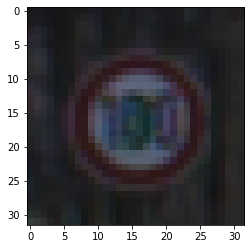

In [57]:
i = 500
plt.imshow(X_train_gray[i].squeeze(), cmap='gray')
plt.figure()
plt.imshow(X_train[i])

# STEP 5: Build the model

In [16]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [18]:
cnn_model = Sequential()

cnn_model.add(Conv2D(32,3, 3, input_shape = image_shape, activation='relu'))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))

cnn_model.add(Flatten())

cnn_model.add(Dense(output_dim = 32, activation = 'relu'))
cnn_model.add(Dense(output_dim = 43, activation = 'sigmoid'))

In [19]:
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001),metrics =['accuracy'])

# STEP 6: Train the model

In [20]:
history = cnn_model.fit(X_train_gray_norm,
                        y_train,
                        batch_size=500,
                        nb_epoch=25,
                        verbose=1,
                        validation_data = (X_validation_gray_norm,y_validation))

Train on 34799 samples, validate on 4410 samples
Epoch 1/25
34799/34799 [==============================] - 29s 845us/step - loss: 3.3302 - accuracy: 0.0748 - val_loss: 3.2046 - val_accuracy: 0.0660
Epoch 2/25
34799/34799 [==============================] - 26s 748us/step - loss: 2.3677 - accuracy: 0.2424 - val_loss: 2.0764 - val_accuracy: 0.4533
Epoch 3/25
34799/34799 [==============================] - 25s 729us/step - loss: 1.2708 - accuracy: 0.6698 - val_loss: 1.4853 - val_accuracy: 0.6104
Epoch 4/25
34799/34799 [==============================] - 26s 738us/step - loss: 0.9167 - accuracy: 0.7691 - val_loss: 1.1807 - val_accuracy: 0.6864
Epoch 5/25
34799/34799 [==============================] - 26s 755us/step - loss: 0.7268 - accuracy: 0.8254 - val_loss: 1.0518 - val_accuracy: 0.7245
Epoch 6/25
34799/34799 [==============================] - 25s 723us/step - loss: 0.6103 - accuracy: 0.8550 - val_loss: 0.9846 - val_accuracy: 0.7492
Epoch 7/25
34799/34799 [==============================] -

# STEP 7: Test the model

In [59]:
score = cnn_model.evaluate(X_test_gray_norm, y_test, verbose= 1)
print('Test Accuracy : {:.4f}'.format(score[1]))

12630/12630 [==============================] - 6s 458us/step
Test Accuracy : 0.8633


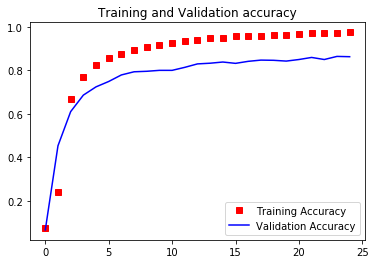

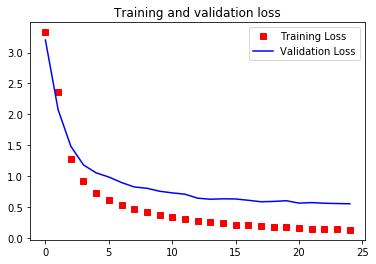

In [69]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'rs', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'rs', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [24]:
predicted_classes = cnn_model.predict_classes(X_test_gray_norm)

In [70]:
predicted_classes

array([16,  1, 38, ...,  5,  3, 10], dtype=int64)

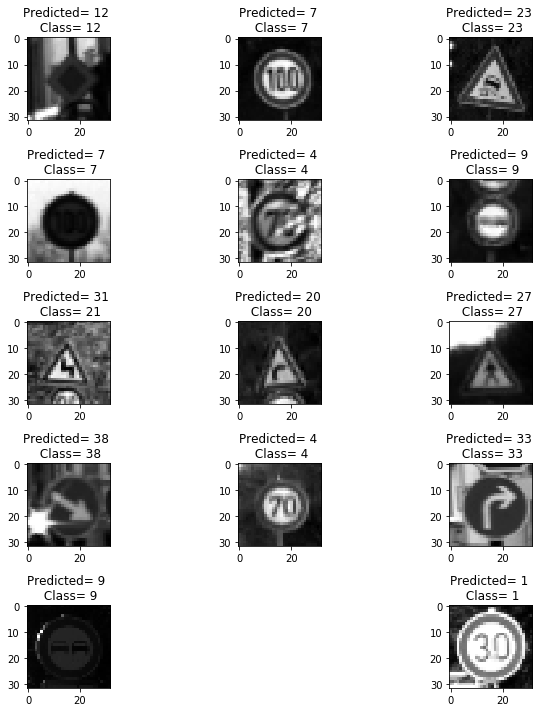

In [47]:
plt.figure(figsize= (10, 10))
for i in range(0,15):
    plt.subplot(5,3,i+1)
    plt.imshow(X_test_gray_norm[i+10].squeeze(), cmap='gray', interpolation='none')
    plt.title("Predicted= {} \n Class= {}".format(predicted_classes[i+10], y_true[i+10]))
    plt.tight_layout()